## Game of Life Individual Assignments
---

Initial Imports and Parameters

In [119]:
import numpy as np
from scipy import signal
from time import sleep
from IPython.display import clear_output
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('seaborn-pastel')

## Initial functions for playing the game

In [120]:
def initialize_board(board_size, initial_config=False, prob_alive=0.5):
    if initial_config == False:
        return np.random.choice([0,1], (board_size, board_size), p=[1-prob_alive, prob_alive])
    board = np.zeros(board_size**2, dtype=int).tolist()
    for item in initial_config:
        board[item] = 1
    return np.array(board, dtype=int).reshape((board_size, board_size))


def life_iteration(board, boundary_conditions='wrap'):

    kernal = np.array([[1,1,1],
                       [1,0,1],
                       [1,1,1]])

    conv_board = signal.convolve2d(board, kernal, mode="same", boundary=boundary_conditions)

    survive = np.where(np.logical_and(np.logical_or(conv_board == 2, conv_board == 3), board == 1), 1, 0)
    new_life = np.where(np.logical_and(conv_board == 3, board == 0), 1, 0)

    board = survive + new_life

    return board

def better_than_FuncAnimation(frames, board, boundary_conditions='wrap'):
    """Because FuncAnimation was written by a mouth breather."""

    plt.figure()
    pop_density_t = []
    for i in range(frames):
        density = np.mean(board) * 100
        pop_density_t.append(density)
        plt.title("Generation: {} \nDensity: {}".format(i+1, density))
        plt.imshow(board)
        plt.show()
        board = life_iteration(board, boundary_conditions=boundary_conditions)
        sleep(0.01)
        clear_output(wait=True)

    return pop_density_t

## 14.6 (a)
Choose several initial configurations with a small number of live cells and determine the different types of patterns that emerge. Some suggested initial configurations are shown in Figure 14.2b. Does it matter whether you use fixed or periodic boundary conditions? Use a 16 × 16 lattice.

### Random board, 200 iterations, periodic boundary conditions
Periodic vs fixed boundary conditions make obvious difference. Patterns stabilize faster with fixed boundary conditions

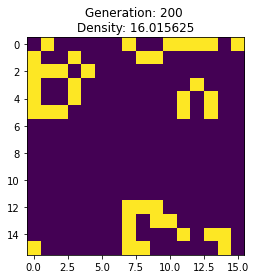

In [121]:
board_size = 16
iterations = 200
board = initialize_board(board_size)
data = better_than_FuncAnimation(iterations, board)

### Random board, 200 iterations, fixed boundary conditions

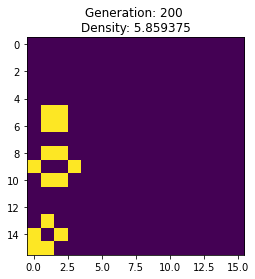

In [122]:
board = initialize_board(board_size)
data = better_than_FuncAnimation(iterations, board, boundary_conditions='fill')


Given a np.arrange() board as index values, the specified locations indicate where life begins.

In [123]:
print(np.arange(board_size ** 2, dtype=int).reshape((board_size, board_size)))

[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15]
 [ 16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31]
 [ 32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47]
 [ 48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63]
 [ 64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79]
 [ 80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95]
 [ 96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111]
 [112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127]
 [128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
 [144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159]
 [160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175]
 [176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191]
 [192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207]
 [208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223]
 [224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 

### Board arrangement # 1

In [124]:
population_seed = np.arange(112, 128).tolist()
board = initialize_board(board_size, initial_config=population_seed)
print(board)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


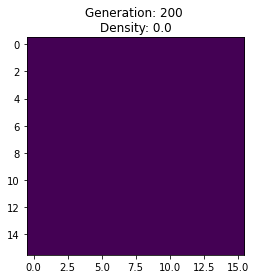

In [125]:
data = better_than_FuncAnimation(iterations, board)

### Board arrangement # 2

In [126]:
population_seed = np.arange(112, 128).tolist() + np.arange(7, 248, 16).tolist()
board = initialize_board(board_size, initial_config=population_seed)
print(board)

[[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]]


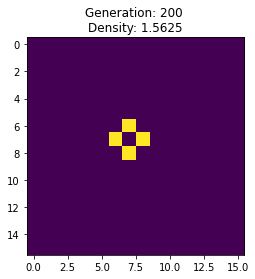

In [127]:
data = better_than_FuncAnimation(iterations, board)

### Board arrangement # 3

In [128]:
population_seed = np.arange(112, 128).tolist() + np.arange(7, 248, 16).tolist() + np.arange(0, 256, 17).tolist() + np.arange(15, 241, 15).tolist()
board = initialize_board(board_size, initial_config=population_seed)
print(board)

[[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1]]


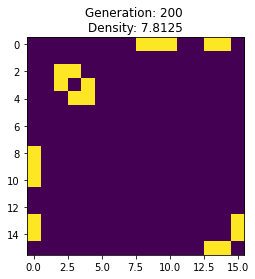

In [129]:
data = better_than_FuncAnimation(iterations, board)

## 14.6 (b)
Modify LifeApp so that each cell is initially alive with a 50% probability. Use a 32 × 32 lattice. What types of patterns typically result after a long time? What happens for 20% live cells? What happens for 70% live cells?

### 50% live cells, 200 iterations
Density becomes relatively stable with clusters radiating and colliding as they traverse the board.
Simple shapes such as 2x2 squares stable unless perturbed by radiations from larger groups.

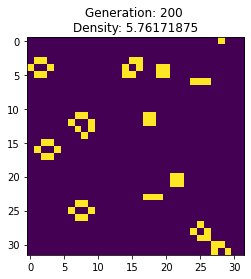

In [130]:
board_size = 32
board = initialize_board(board_size, prob_alive=0.5)
data = better_than_FuncAnimation(iterations, board)

### 20% live cells, 200 iterations
Not noticeably different from 50% live cells.

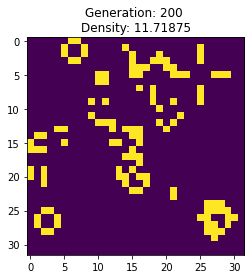

In [131]:
board = initialize_board(board_size, prob_alive=0.2)
data = better_than_FuncAnimation(iterations, board)

### 70% live cells, 200 iterations
Initial population too high causing massive die off in first few iterations. Simple shapes stable after initial population collapse.

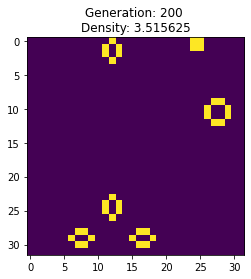

In [132]:
board = initialize_board(board_size, prob_alive=0.7)
data = better_than_FuncAnimation(iterations, board)

## 14.6 (c)
Assume that each cell is initially alive with probability p. Given that the density of live cells at time t is ρ(t), what is ρ(t + 1), the expected density at time t + 1? Do the simulation and plot ρ(t + 1) versus ρ(t). If p = 0.5, what is the steady-state density of live cells?


### p = 0.5

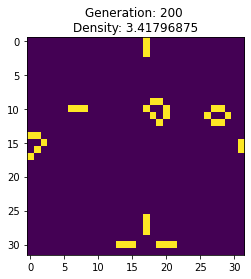

In [142]:
board = initialize_board(32, prob_alive=0.5)
data = better_than_FuncAnimation(iterations, board)

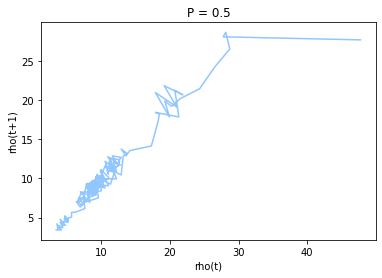

In [143]:
x = data[:-1]
y = data[1:]
plt.title("P = 0.5")
plt.xlabel("rho(t)")
plt.ylabel("rho(t+1)")
plt.plot(x, y)
plt.show()

### p = 0.2


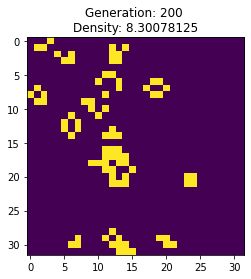

In [144]:
board = initialize_board(32, prob_alive=0.2)
data = better_than_FuncAnimation(iterations, board)

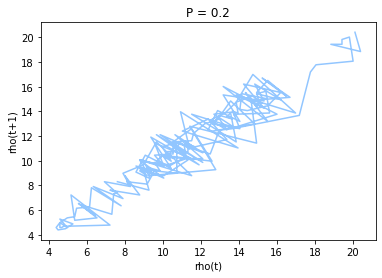

In [145]:
x = data[:-1]
y = data[1:]
plt.title("P = 0.2")
plt.xlabel("rho(t)")
plt.ylabel("rho(t+1)")
plt.plot(x, y)
plt.show()

### p = 0.3

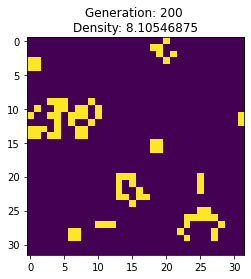

In [146]:
board = initialize_board(32, prob_alive=0.3)
data = better_than_FuncAnimation(iterations, board)

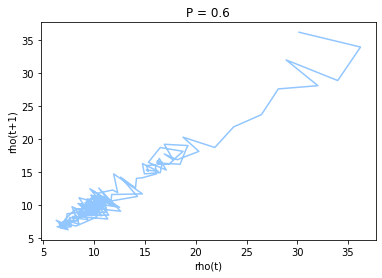

In [147]:
x = data[:-1]
y = data[1:]
plt.title("P = 0.6")
plt.xlabel("rho(t)")
plt.ylabel("rho(t+1)")
plt.plot(x, y)
plt.show()
